In [74]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import os
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as colrs
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
from shapely.geometry import shape as Shape
import numpy as np
from descartes.patch import PolygonPatch
import shutil
from shapely.geometry.polygon import Polygon
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib.legend import Legend
import seaborn as sns

In [75]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

In [76]:
city_str = 'Marseille'
app_str = 'Instagram' 

In [77]:
path =  f'./dataset/{city_str}/{app_str}/'

In [78]:
days = os.listdir(path)

In [79]:
day = "20190331"

In [80]:
date = datetime.datetime.strptime(day, '%Y%m%d')
times = [date + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]
columns = ['tile_id'] + times_str

# Now i want to group all days in one dataframe

In [81]:
list_of_days_means = []

In [82]:
def fillna_with_row_mean(row):
    mean_value = row.mean()
    return row.fillna(mean_value)

In [83]:
dictionary_days = dict()

In [84]:
#get mean traffic of each day
for day in days:
    df_traffic_day = f'./dataset/{city_str}/{app_str}/{day}/{city_str}_{app_str}_{day}_DL.txt'
    df_day_means = pd.read_csv(df_traffic_day, sep=' ', names=columns)

    df_day = df_day_means.copy()
    tiles = df_day_means['tile_id']
    
    df_day_means.drop('tile_id',axis= 1, inplace = True)
    #check for null values
    if df_day_means.isna().any().any():
        print(df_traffic_day)
        df_day_means = df_day_means.apply(fillna_with_row_mean, axis=1)

    df_day['tile_id'] = tiles
    dictionary_days[day] = df_day
        
    df_day_means = df_day_means.mean()
    df_day_means['day'] = day
    list_of_days_means.append(df_day_means)

./dataset/Marseille/Instagram/20190331/Marseille_Instagram_20190331_DL.txt


In [85]:
df = pd.concat(list_of_days_means, axis=1).transpose()

# save all days in as csv files in folder

In [86]:
os.mkdir(path+'/all_days_in_csv')

In [87]:
for d_f in dictionary_days:
    dictionary_days[d_f].to_csv(path+'/all_days_in_csv/'+d_f+'.csv', index=False) 

# removing outliers

In [88]:
df.set_index('day',inplace = True)

In [89]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_after_rm_outliers = df[~outliers]

In [90]:
df_outliers = df[outliers]

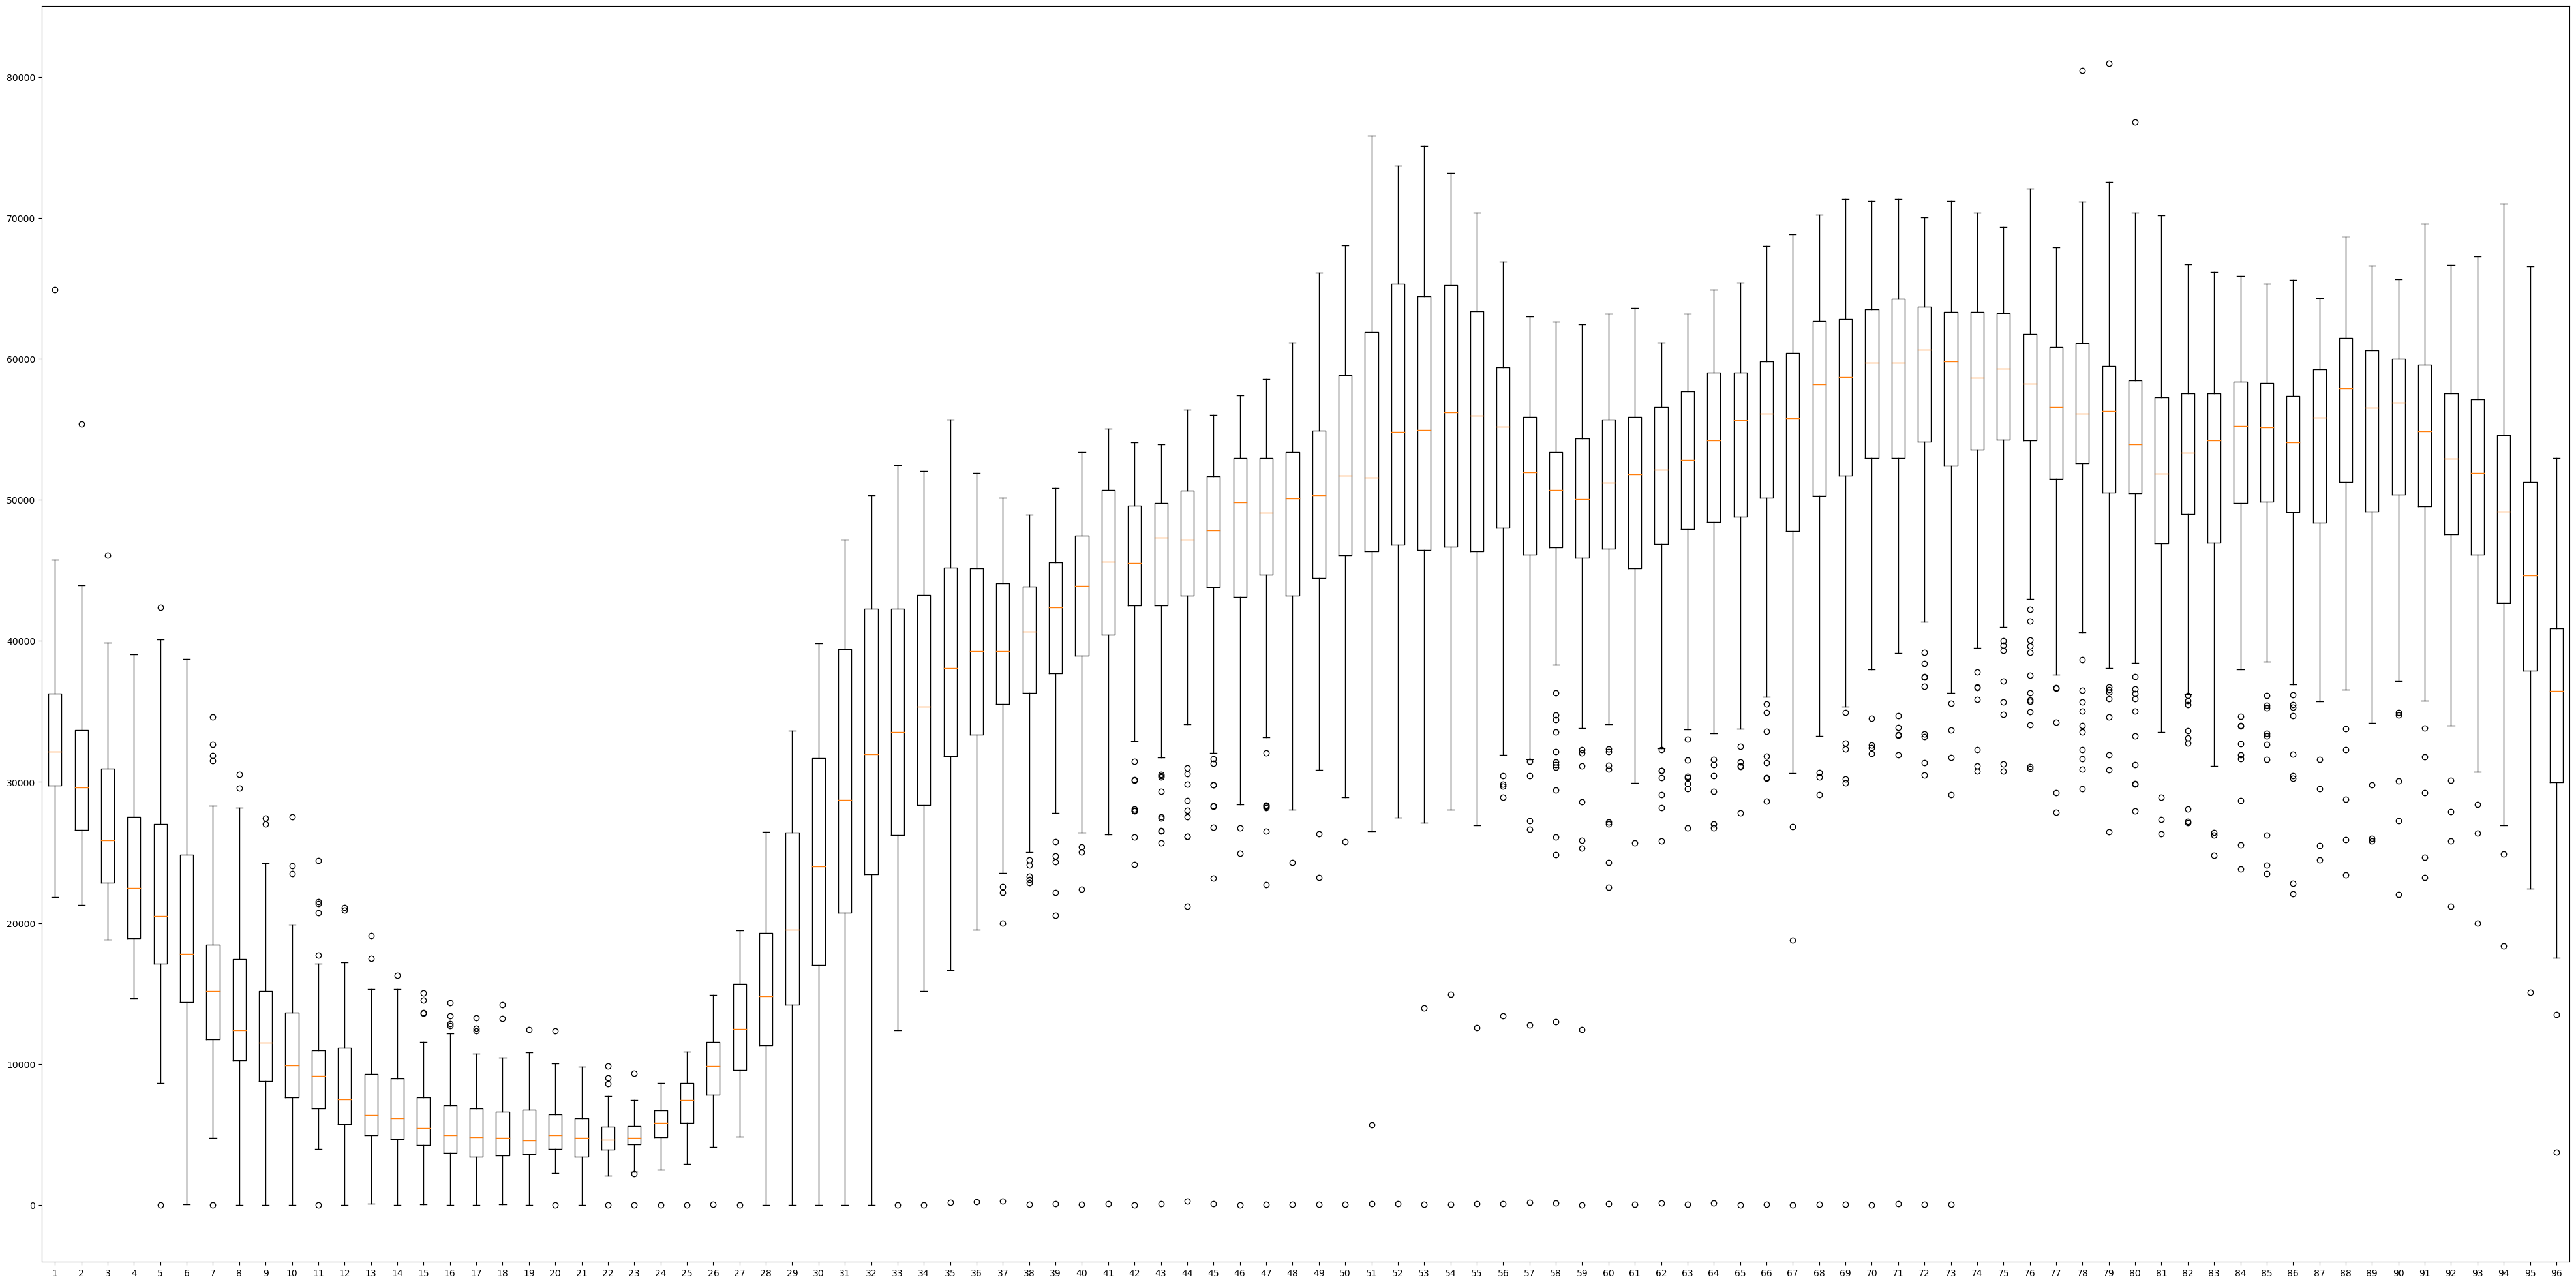

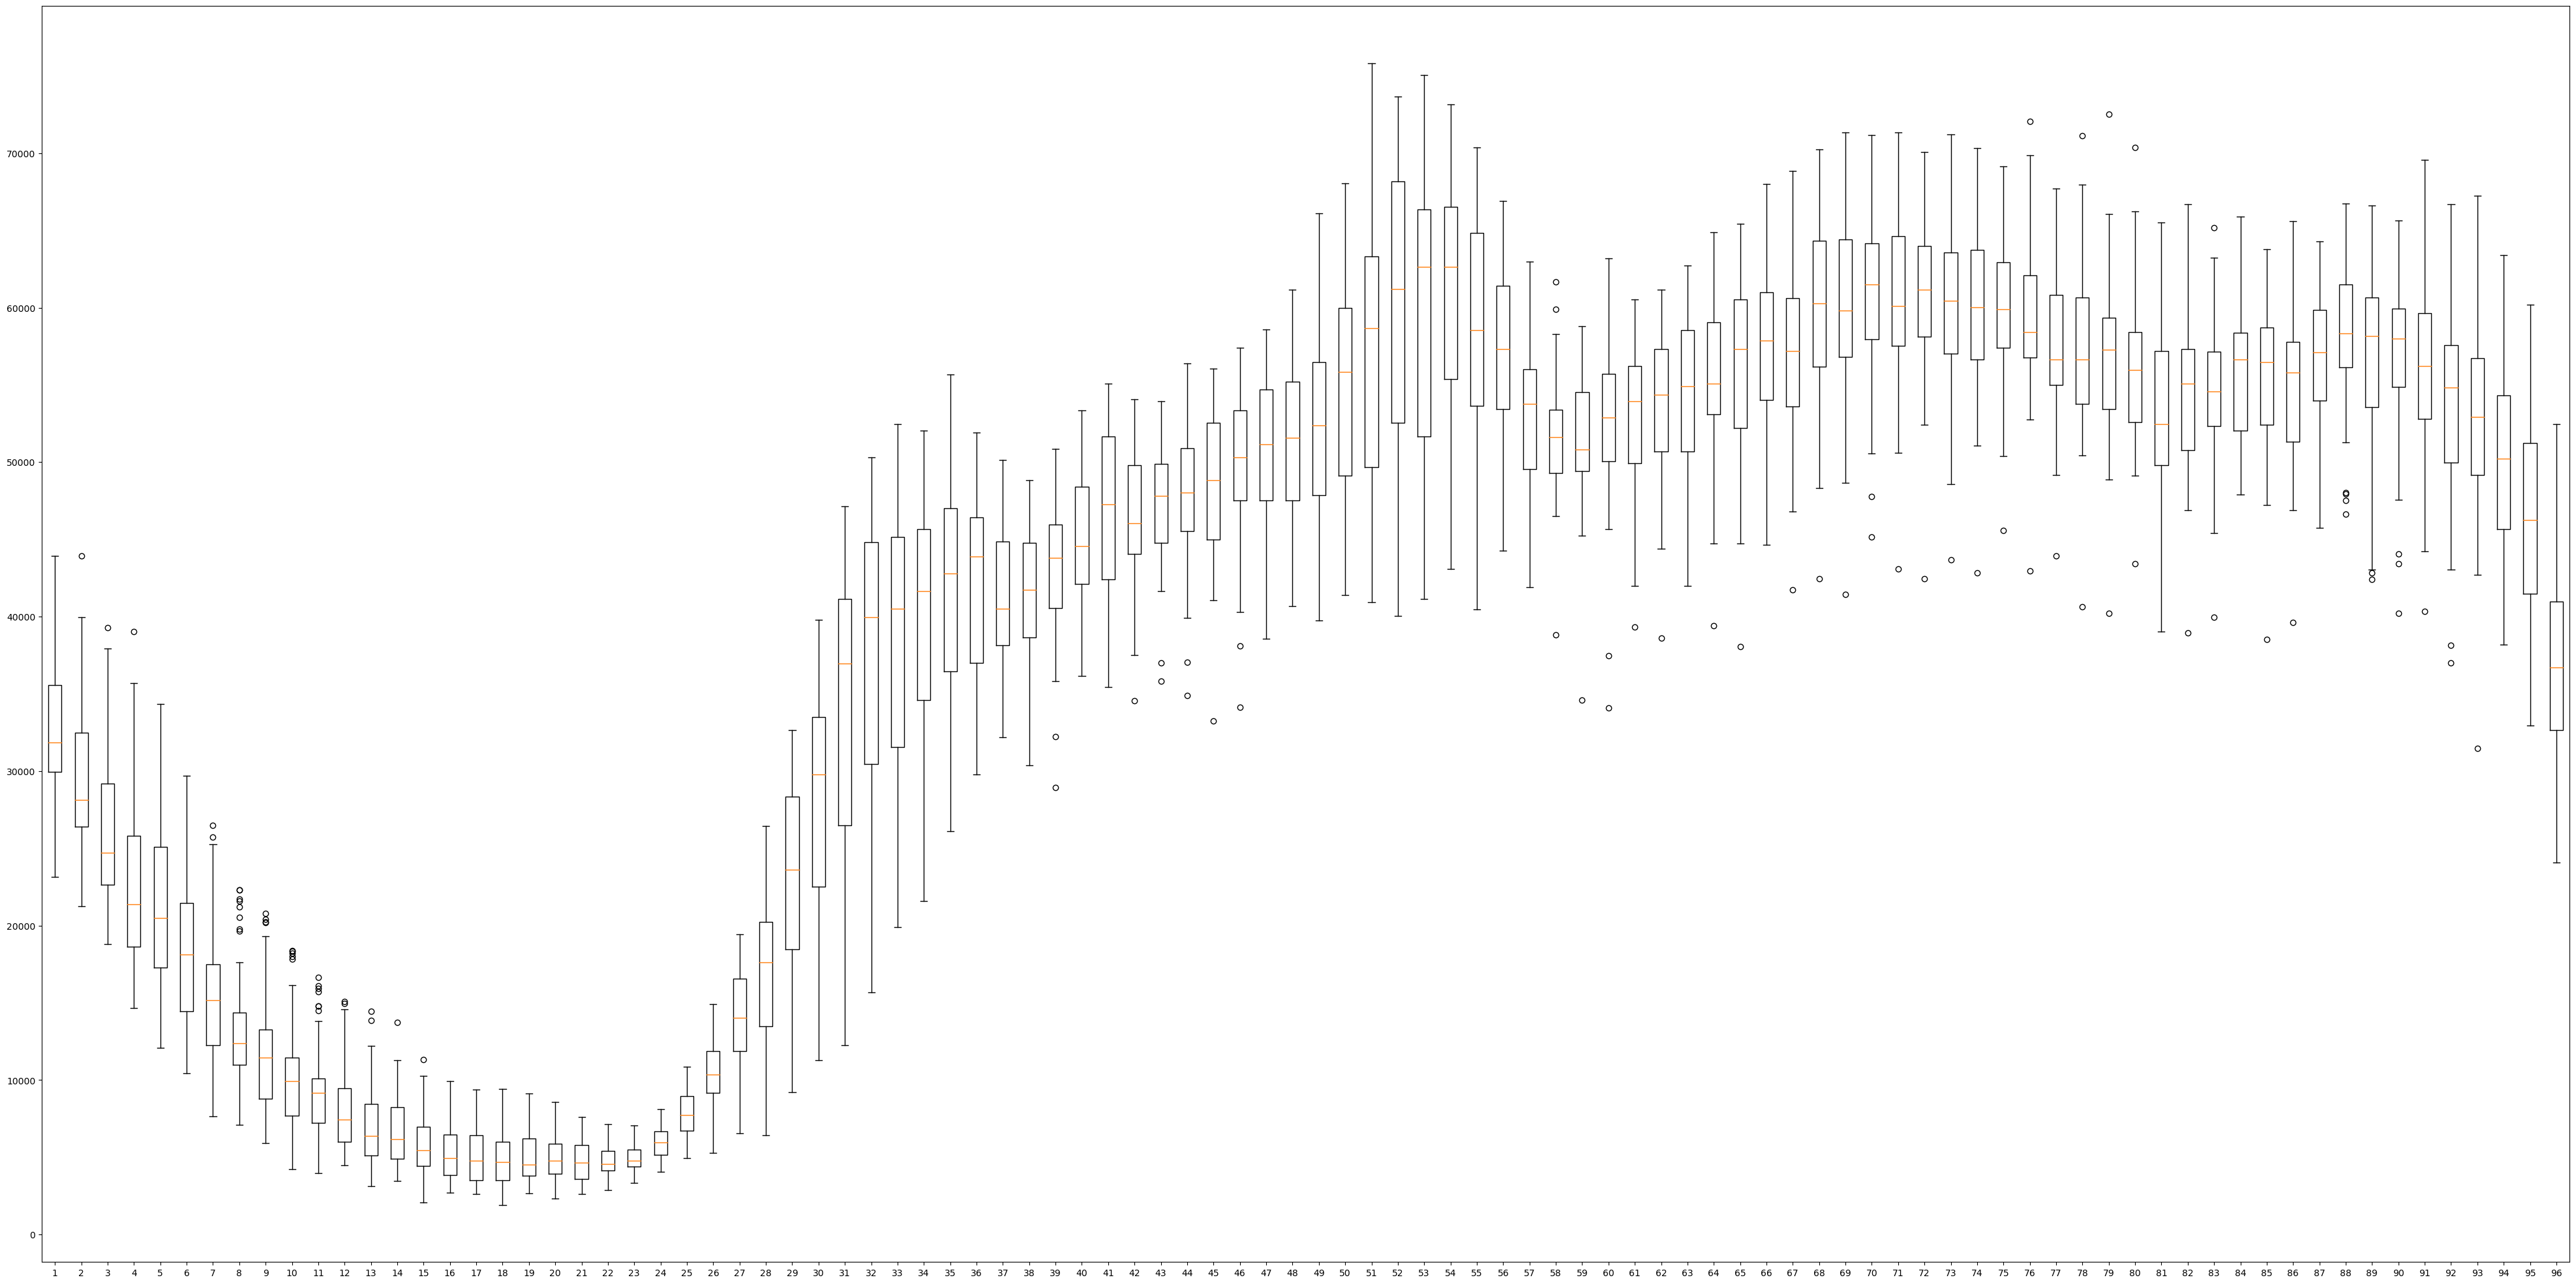

In [91]:
fig1 = plt.figure(figsize =(50, 25))
plt.boxplot(df)
plt.show()

fig2 = plt.figure(figsize =(50, 25))
plt.boxplot(df_after_rm_outliers)
plt.show()

# ------------------------------------------------------------------------------------------

In [92]:
df_after_rm_outliers.reset_index(drop=False, inplace=True)

In [93]:
df_outliers.reset_index(drop=False, inplace=True)

In [94]:
df_outliers

,day,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,20190317,40573.683683,40144.193931,38041.931412,33920.301357,31799.993323,26080.68829,25718.892279,22673.671555,20100.242995,...,53498.154672,68627.095846,66079.076068,50616.60322,64271.649537,54961.990787,52365.730254,51064.941639,43789.691417,36652.998859
1,20190329,64886.699446,55360.529857,46063.463593,37095.170308,34553.903309,26296.308287,22462.737311,17431.162532,15179.628154,...,55456.2214,54916.030005,48926.865571,56723.235473,52856.641381,53260.242826,48958.562143,48793.504289,46350.494147,39033.209652
2,20190330,35477.508304,33432.299877,27854.350336,24664.899632,21697.177027,18606.198327,15542.584584,15468.054896,13731.633521,...,59537.987449,61207.174576,60478.679669,62565.438533,58485.710223,58653.404894,60326.345814,54756.04226,54494.261167,48598.753793
3,20190408,32136.865106,27665.708744,24651.672315,21437.636901,20572.96746,15775.705109,12034.965347,12309.894772,10538.921016,...,51627.409585,49011.991294,48467.038245,51499.728437,51545.08228,49778.167392,50035.685839,47832.163673,40690.612686,33009.441111
4,20190414,44865.000845,40805.822423,37904.258674,35339.076787,31843.244221,32370.149389,27450.465283,23770.474707,21043.636225,...,54862.757681,56801.009551,58111.414909,58325.843638,57234.301948,53673.320627,58150.476102,54573.260745,48957.061615,42591.954275
5,20190421,44258.555044,41182.671639,38653.202764,36275.73541,34636.167096,31594.260914,28289.081139,25247.851625,24224.358492,...,60216.096437,60348.131302,57834.053755,60167.351266,59946.667286,56282.225331,61015.391751,56417.3994,55513.428602,48363.058234
6,20190428,45195.288425,42188.409331,39873.854879,37932.818282,40095.708279,33833.911423,31885.624942,28167.495499,27432.208384,...,59051.963234,62049.304611,62155.432616,60021.045218,56437.160166,58947.809787,65625.127541,71018.754427,66570.18045,52984.168702
7,20190502,30669.382538,28005.384186,24213.534759,20249.902675,18405.934877,14361.385708,11736.890082,8411.097367,10099.976799,...,39602.548155,39565.7068,39122.486878,38402.23915,41339.965516,38663.65837,36100.887335,32253.345476,31726.927355,25043.511938
8,20190503,32611.41529,33087.96205,29822.873938,24373.268013,11592.710688,10665.968685,7579.812999,7302.365,4935.750158,...,35732.319233,32297.289735,35647.530279,37808.320965,36205.418037,34028.099396,32557.152094,32175.380467,31201.717576,25888.702996
9,20190504,29158.017538,29728.253941,27542.530702,24758.591725,17355.769683,15612.890631,12670.503106,10458.430038,10760.978574,...,35700.743608,36544.176055,34159.209103,37135.253349,38252.200482,37857.64603,39047.851836,35707.639564,31950.3104,30985.16118


In [95]:
#dictionary to group all days by its name
dictonary_of_days = dict()

In [96]:
for day in df_after_rm_outliers['day'].tolist():
    d = datetime.datetime.strptime(day, '%Y%m%d')
    if d.strftime('%A') in dictonary_of_days:
        dictonary_of_days[d.strftime('%A')].append(day)
    else:
        dictonary_of_days[d.strftime('%A')] = []
        dictonary_of_days[d.strftime('%A')].append(day)

In [97]:
#create directory for each day_name
for day in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    os.makedirs(path+day)

In [98]:
# group the days by its name each one in its directory
for day in dictonary_of_days.keys():
    for d in dictonary_of_days[day]:
            source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            source += d + ".csv"
            destination = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            destination = destination + day
            shutil.move(source, destination)

In [99]:
os.makedirs(path+"outliers")

In [100]:
for file in df_outliers['day'].tolist():
    source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    destination = source + "/outliers"
    source += file+".csv"
    shutil.move(source, destination)

In [101]:
l_out= []

In [102]:
day = datetime.datetime.strptime('20190315', '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

In [103]:
# here is grouping all of the excel values for each day under its name 
# ex: group all the saturdays in one saturday.csv file storing the av value for each hour
for day_title in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/" + "all_days_in_csv/" + day_title +"/"
    list_of_d = []
    for curr_day in dictonary_of_days[day_title]:
        curr_path = path + "/" + f"{curr_day}.csv"
        df = pd.read_csv(curr_path)
        list_of_d.append(df)
    merged_df = pd.concat(list_of_d).groupby('tile_id').mean()
    l_out.append(merged_df)
    merged_df.to_csv(path+day_title+'.csv')

In [104]:
# makeing all dfs without indexes 
for d in l_out:
    d.reset_index(inplace = True);

# Load data of weeks

In [105]:
list_df_days = []

In [106]:
days_names = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [107]:
path_o = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [108]:
for day_name in days_names:
    file_path = path_o + day_name + "/" + day_name + ".csv"
    df = pd.read_csv(file_path)
    list_df_days.append(df)

In [109]:
start_time = pd.Timestamp('00:00:00')
end_time = pd.Timestamp('23:59:59')
time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')
times_str = [time.strftime('%H:%M') for time in time_intervals]

In [110]:
merged_df_ = pd.concat(list_df_days).groupby('tile_id').mean()
merged_df_.to_csv(path_o+"all_days.csv")

# ------------------------------------------------------------------------------------------

# Clustering tiles using average daily traffic

In [111]:
path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [112]:
df = pd.read_csv(path+"all_days.csv")

In [113]:
df_places = gpd.read_file('./dataset/'+'Marseille.geojson')

In [114]:
merged_with_shapes = df_places.merge(df, on='tile_id')

In [115]:
avg_list = []

In [116]:
for index, row in merged_with_shapes.iterrows():
    avg_list.append(sum(row[2:len(row)])/96)

In [117]:
merged_with_shapes['avg_traffic'] = avg_list

In [118]:
g1 = np.percentile(avg_list, 20)
g2 = np.percentile(avg_list, 40)
g3 = np.percentile(avg_list, 60)
g4 = np.percentile(avg_list, 80)

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


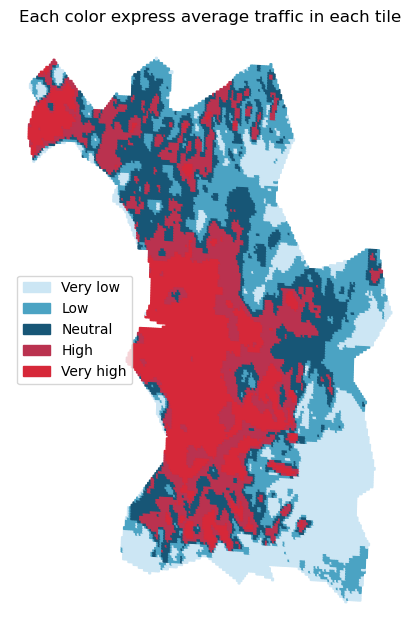

In [119]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

plt.title('Each color express average traffic in each tile')

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    if row['avg_traffic'] > g4:
        ax.fill(*polygon.exterior.xy, color=colors[4])
    elif row['avg_traffic'] > g3:
        ax.fill(*polygon.exterior.xy, color=colors[3])
    elif row['avg_traffic'] > g2:
        ax.fill(*polygon.exterior.xy, color=colors[2])
    elif row['avg_traffic'] > g1:
        ax.fill(*polygon.exterior.xy, color=colors[1])
    else:
        ax.fill(*polygon.exterior.xy, color=colors[0])


plt.autoscale(True)
plt.axis('off')
patch1 = mpatches.Patch(color='#CCE6F4', label='Very low')
patch2 = mpatches.Patch(color='#4BA3C3', label='Low')
patch3 = mpatches.Patch(color='#175676', label='Neutral')
patch4 = mpatches.Patch(color='#BA324F', label='High')
patch5 = mpatches.Patch(color='#D62839', label='Very high')

plt.legend(handles=[patch1, patch2,patch3,patch4,patch5])

plt.show()

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


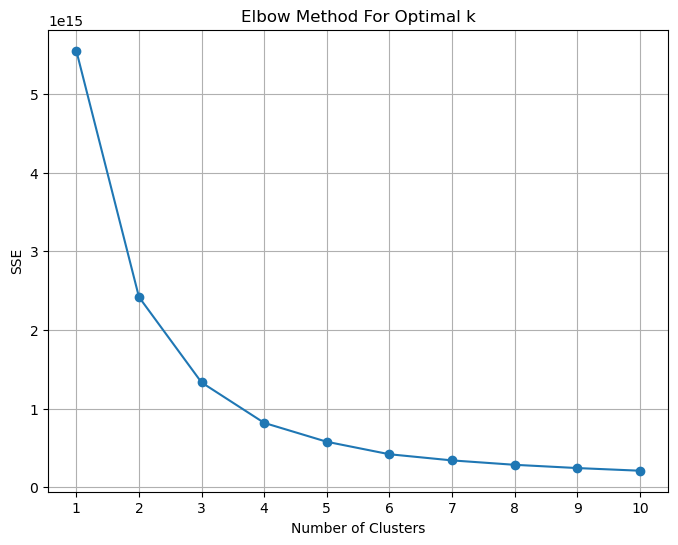

In [120]:
df_int = merged_with_shapes.select_dtypes(include='int64').dropna()
df_float = merged_with_shapes.select_dtypes(include='float64').dropna()

result = pd.merge(left=df_int, right=df_float, left_index=True, right_index=True)

def find_optimal_clusters(data, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(f'Fit {k} clusters')

    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(iters)
    plt.grid(True)
    plt.show()


find_optimal_clusters(result, 10)

In [121]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(result)
merged_with_shapes['Segmentation'] = kmeans.labels_

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


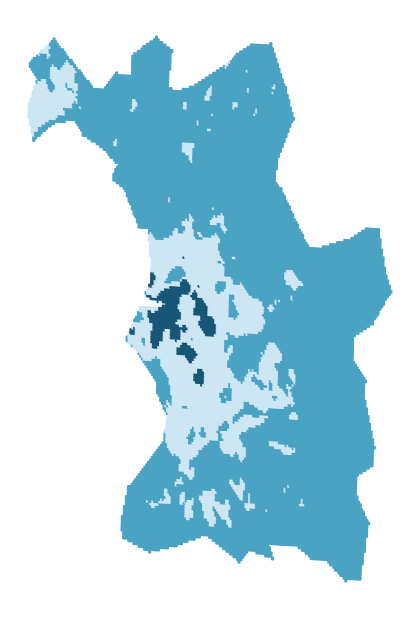

In [122]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    ax.fill(*polygon.exterior.xy, color=colors[row['Segmentation']])


plt.autoscale(True)
plt.axis('off')


plt.savefig("C:/Users/Dell/Desktop/{city_str}_{app_str}_map.png")

# Get day's average traffic per hour

In [123]:
def aggregate_columns(df, agg_func=np.sum):
    n = 4
    new_columns = []

    for i in range(0, df.shape[1], n):
        cols = df.iloc[:, i:i+n]
        new_col = cols.apply(agg_func, axis=1)
        start_time = cols.columns[0][:2]
        end_time = cols.columns[min(n-1, len(cols.columns)-1)][:2]
        new_col_name = f"{start_time}:00 - {end_time}:45"
        new_columns.append(new_col.rename(new_col_name))

    return pd.concat(new_columns, axis=1)

In [124]:
aggregated_data = {}

In [125]:
for day in days_names:
    file_path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/{day}/{day}.csv'
    df = pd.read_csv(file_path)
    if 'tile_id' in df.columns:
        df.drop('tile_id', axis = 1 , inplace=True)
    
    df_aggregated = aggregate_columns(df, agg_func=np.sum)
    aggregated_data[day] = df_aggregated

In [126]:
aggregated_data_mean = {}

In [127]:
for day in days_names:
    df = aggregated_data[day]
    mean_values = df.mean(axis=0)
    mean_df = pd.DataFrame(mean_values).transpose()
    aggregated_data_mean[day] = mean_df

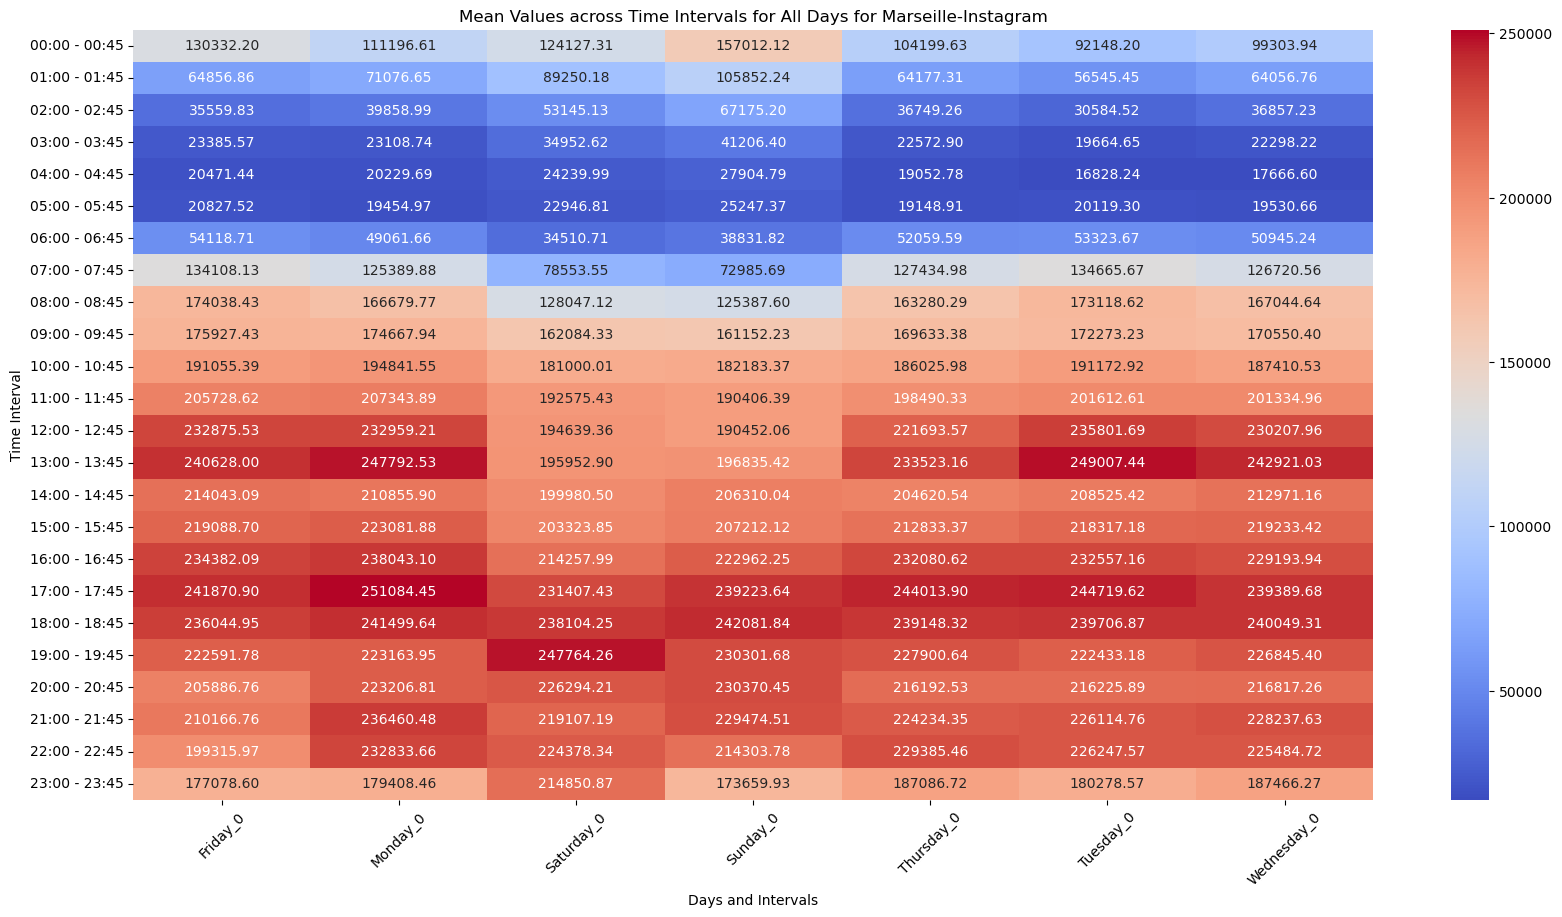

In [128]:
frames = []

for day in days_names:
    mean_df = aggregated_data_mean[day].transpose()
    mean_df.columns = [day + '_' + str(col) for col in mean_df.columns] 
    frames.append(mean_df)

combined_df = pd.concat(frames, axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Mean Values across Time Intervals for All Days for Marseille-Instagram')
plt.ylabel('Time Interval')
plt.xlabel('Days and Intervals')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()